# Tarefa 2

<b>Alunos:</b> Andreza(164213), Gil(225323) e Yan(118982)

## Importar bibliotecas básicas:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Minimizar a função do problema de Rosenbrock: 

<img src="assets/funcao.png">

## Gráfico da Superfície de Rosenbrock

<Figure size 432x432 with 0 Axes>

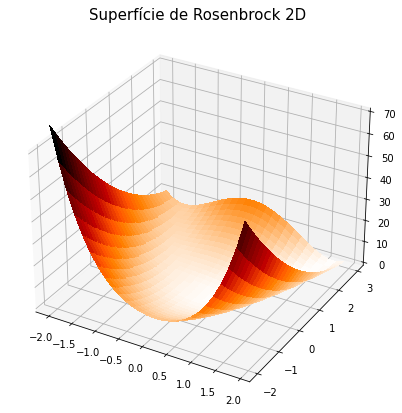

In [26]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(6,6))
rosenbrock_func = lambda x,y: (x-1)**2 + 2*(y-x**2)**2
# Inicializa uma plt figure
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')

# Cria a superfícia a ser plotada usando o intervalo X1 [-2, 2] e X2 [-1, 3]
surface_x1 = np.arange(-2, 2, 0.15)
surface_x2 = np.arange(-2, 3, 0.15)
surface_x1, surface_x2 = np.meshgrid(surface_x1, surface_x2)
function_surface = rosenbrock_func(surface_x1, surface_x2)
# Plot the surface
surf = ax.plot_surface(surface_x1, surface_x2, function_surface, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 70)
ax.set_title("Superfície de Rosenbrock 2D", fontsize=15)
plt.show()

Uma função não convexa. A região do mínimo, a parte esbranquiçada do vale, é muito plana. A planície, por sua vez, dificulta o algorítimo de encontrar o valor exato do ponto mínimo da função, que no caso é o ponto (1,1). Vamos assumir que nosso ponto de partida seja a origem, já na região de planície.

### Função para plotar a descida do gradiente: 

In [27]:
def plot_gradient_descent(surface_x1: np.array,
                          surface_x2: np.array,
                          function_surface: np.array,
                          x1_values: np.array,
                          x2_values: np.array) -> None:
    # Initialize figure 
    plt.figure(figsize=(12, 7))
    plt.contour(surface_x1, surface_x2, function_surface, 50)
    plt.plot([0],[0], marker='o', markersize = 10, color = 'r')
    plt.plot(last_x[0], last_x[1], '*', markersize=10, color = 'r')
    path = [x1_values.T, x2_values.T]
    path = np.asarray(path)
    plt.quiver(path[0,:-1], path[1,:-1],
               path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
               scale_units = 'xy', angles = 'xy', scale = 15, color = 'k')
    plt.legend(['o', '*'],
               labels=["Ponto inicial {}".format((0, 0)),
                       "Ponto final {}".format((round(last_x[0], 8), round(last_x[1], 8)))])
    plt.xlabel("X1", fontsize=13)
    plt.ylabel("X2", fontsize=13)

## Descida do gradiente explícita 

### Definindo a função Rosenbrock 2D a ser otimizada e a função que calcula o gradiente

In [28]:
def rosenbrock_2d(x: np.array) -> float:
    x1 = x[0]
    x2 = x[1]
    return np.power((1 - x1), 2) + 100*np.power((x2 - x1**2), 2)

def calc_gradient(x: np.array) -> list:
    x1 = x[0]
    x2 = x[1]
    dx1 = -400*x1*x2 + 400*np.power(x1, 3) + 2*x1 - 2
    dx2 = 200*x2 - 200*np.power(x1, 2)
    return [dx1, dx2]

### Função de descida do gradiente

In [29]:
def gradient_descent(lr: float, lr_decay:float) -> tuple:
 
    # Variavel para salvar valores de f
    function_values = []
    
    # Ponto inicial
    current_x = [0, 0]
    # Salva valor de f no ponto inicial
    previous_f = rosenbrock_2d(current_x)
    function_values.append(previous_f)
    
    # Variaveis para plotar grafico
    X1 = []
    X2 = []
    X1.append(current_x[0])
    X2.append(current_x[1])
    
    step = 0
    while step < 5e4:
        step += 1
        # Calcula gradientes e aplica
        # descida do gradiente nos pontos
        gradients = calc_gradient(current_x)
        current_x -= lr*np.asarray(gradients)
        
        # Calcula valor da função no novo ponto
        current_f = rosenbrock_2d(current_x)
        function_values.append(current_f)     
        X1.append(current_x[0])
        X2.append(current_x[1])
        # Checagem da tolerancia
        tol_value = np.absolute(current_f - previous_f)
        if tol_value < 1e-5:
            break
        previous_f = current_f
        lr *= lr_decay

    # Retorna todos os valores assumidos pela função
    # e o ponto final
    print("Ultimo valor de f:", current_f)
    print("Ultimo ponto x1 = {0} e x2 = {1}".format(current_x[0], current_x[1]))
    print("Número de passos:", step)
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)

    return [function_values, current_x, X1, X2]

#### Condições
Assumimos interromper a computação depois de 50.000 passos (step < 5e4)
<br>
Nossa tolerância entre a diferença do ponto novo para o ponto velho, em módulo, foi de 0,00001 (1e-5)


### Descida do Gradiente com learning rate 1e-3

In [30]:
lr = 1e-3
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay) 

Ultimo valor de f: 0.010552817956188867
Ultimo ponto x1 = 0.8973659319527167 e x2 = 0.8048289691500664
Número de passos: 3096


Com 3096 passos, a função chegou num valor 0,01055 distante do mínimo, que é 0, quando x1=1 e x2=1.

Text(0, 0.5, 'Rosenbrock 2D')

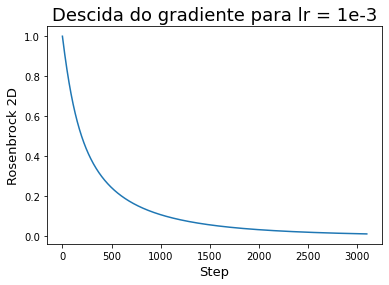

In [31]:
plt.plot(func_values)
plt.title("Descida do gradiente para lr = 1e-3", fontsize=18)
plt.xlabel("Step", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

Percebemos que, para a tolerância e learning rate assumidos, há uma caída exponencial da função. Quanto mais próximo do valor mínimo em zero, mais <i>"steps"</i>, mais passos deve-se tomar para avançar a uma velocidade cada vez menor. Dentre os learning rates assumidos neste trabalho, este foi o que melhor se aproximou do mínimo da função.<br><br>
Abaixo mostramos o caminho percorrido pelo algoritmo.

Text(0.5, 1.0, 'Caminho da descida de gradiente\n para lr = 1e-3')

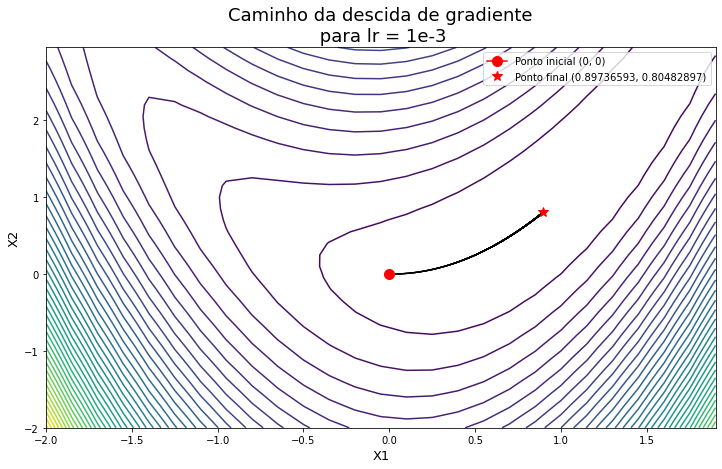

In [32]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente\n para lr = 1e-3", fontsize=18)

### Descida do Gradiente com learning rate 1e-4

In [33]:
lr = 1e-4
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: 0.07731336295746939
Ultimo ponto x1 = 0.7222519131907607 e x2 = 0.5203464298142022
Número de passos: 12384


Conforme diminuímos o learning rate, como o gradiente da função também se torna cada vez mais próximo de zero, levamos mais <i>steps</i> para atingirmos nossa tolerância. Ele entra numa região subótima em comparação com o lr=1e-3

Text(0, 0.5, 'Rosenbrock 2D')

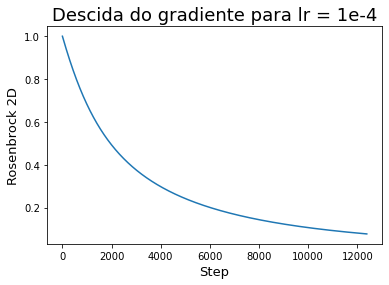

In [34]:
plt.plot(func_values)
plt.title("Descida do gradiente para lr = 1e-4", fontsize=18)
plt.xlabel("Step", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

Text(0.5, 1.0, 'Caminho da descida de gradiente\n para lr = 1e-4')

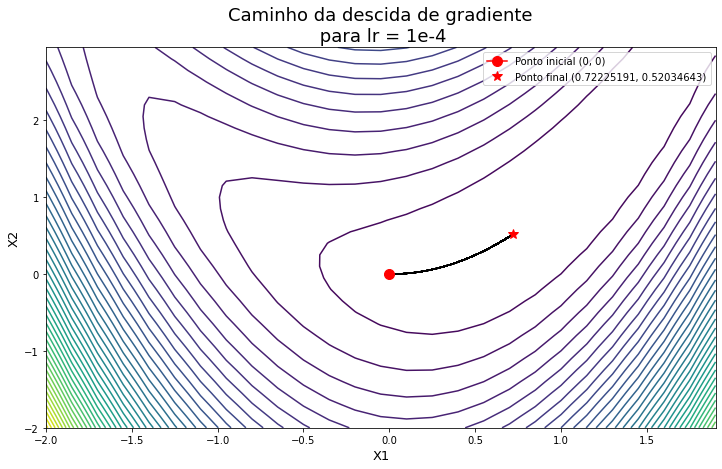

In [35]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente\n para lr = 1e-4", fontsize=18)

### Descida do Gradiente com learning rate 1e-2

In [36]:
lr = 1e-2
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: nan
Ultimo ponto x1 = nan e x2 = nan
Número de passos: 50000


Podemos ver que para valores grandes de $learning$ $rate$, a descida de gradiente não consegue convergir para o ponto mínimo da função. Ao invés disso ela diverge, aumentando seu valor até ocorrer um estouro de memória.

### Descida do Gradiente com política de redução do learning rate

In [37]:
lr = 5e-3
lr_decay = 0.999
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: 0.009292014747243678
Ultimo ponto x1 = 0.9036913756452383 e x2 = 0.8162498914145423
Número de passos: 1472


Text(0, 0.5, 'Rosenbrock 2D')

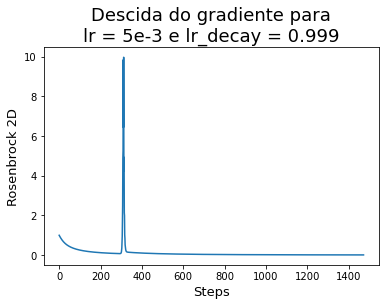

In [38]:
plt.plot(func_values)
plt.title("Descida do gradiente para\nlr = 5e-3 e lr_decay = 0.999", fontsize=18)
plt.xlabel("Steps", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

A nossa função para a descida de gradiente se perde numa região provavelmente de mínimo local, como mostramos no gráfico abaixo na área pontilhada. 

Text(0.5, 1.0, 'Caminho da descida de gradiente para\n lr = 5e-3 e lr_decay = 0.999')

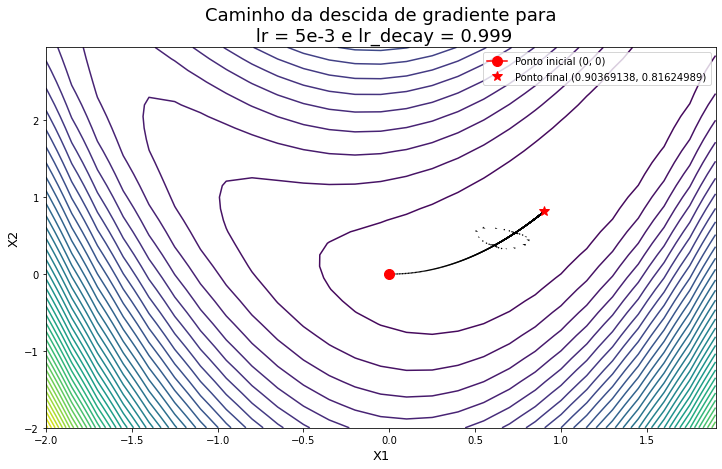

In [39]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente para\n lr = 5e-3 e lr_decay = 0.999", fontsize=18)

## Descida do gradiente utilizando Tensorflow


In [40]:
import tensorflow as tf

### Descida de gradiente com tensorflo e lr = 1e-3 (melhor valor da parte 1)

In [41]:
def calc_gradient_tf(x: np.array) -> tuple:
    
    x1 = tf.Variable(float(x[0]), name='x1', dtype=tf.float32, trainable=True)
    x2 = tf.Variable(float(x[1]), name='x2', dtype=tf.float32, trainable=True)

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x1)
        tape.watch(x2)
        y = (1 - x1)**2 + 100*((x2 - x1**2)**2)

    dx1 = tape.gradient(y, x1).numpy()
    dx2 = tape.gradient(y, x2).numpy()
    return [dx1, dx2]

In [42]:
def gradient_descent_tf(lr: float) -> tuple:
 
    # Variavel para salvar valores de f
    function_values = []
    
    # Ponto inicial
    current_x = [0, 0]
    # Salva valor de f no ponto inicial
    previous_f = rosenbrock_2d(current_x)
    function_values.append(previous_f)
    
    # Variaveis para plotar grafico
    X1 = []
    X2 = []
    X1.append(current_x[0])
    X2.append(current_x[1])
    
    step = 0
    while step < 5e4:
        step += 1
        # Calcula gradientes e aplica
        # descida do gradiente nos pontos
        gradients = calc_gradient_tf(current_x)
        current_x -= lr*np.asarray(gradients)
        # Calcula valor da função no novo ponto
        current_f = rosenbrock_2d(current_x)
        function_values.append(current_f)     
        X1.append(current_x[0])
        X2.append(current_x[1])
        # Checagem da tolerancia
        tol_value = np.absolute(current_f - previous_f)
        if tol_value < 1e-5:
            break
        previous_f = current_f

    # Retorna todos os valores assumidos pela função
    # e o ponto final
    print("Ultimo valor de f:", current_f)
    print("Ultimo ponto x1 = {0} e x2 = {1}".format(current_x[0], current_x[1]))
    print("Número de passos:", step)
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)

    return [function_values, current_x, X1, X2]

In [43]:
func_values, last_x, x1_values, x2_values = gradient_descent_tf(1e-3)

Ultimo valor de f: 0.010552816365783677
Ultimo ponto x1 = 0.8973659428411338 e x2 = 0.8048289813102087
Número de passos: 3096


Podemos ver que a descida de gradiente utilizada na parte um (explícita) e a descida de gradiente utilizando o framework Tensorflow diferem nas respostas finais a partir da oitava casa decimal para os valores de X1 e X2 e nona casa decimal para o mínimo valor assumido pela função. Podemos considerar essas diferenças muito pequenas como desprezíveis.

Text(0, 0.5, 'Rosenbrock 2D')

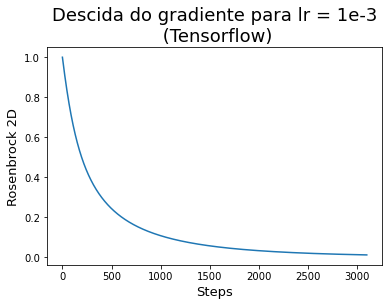

In [44]:
plt.plot(func_values)
plt.title("Descida do gradiente para lr = 1e-3\n (Tensorflow)", fontsize=18)
plt.xlabel("Steps", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

Text(0.5, 1.0, 'Caminho da descida de gradiente para lr = 1e-3\n (Tensorflow)')

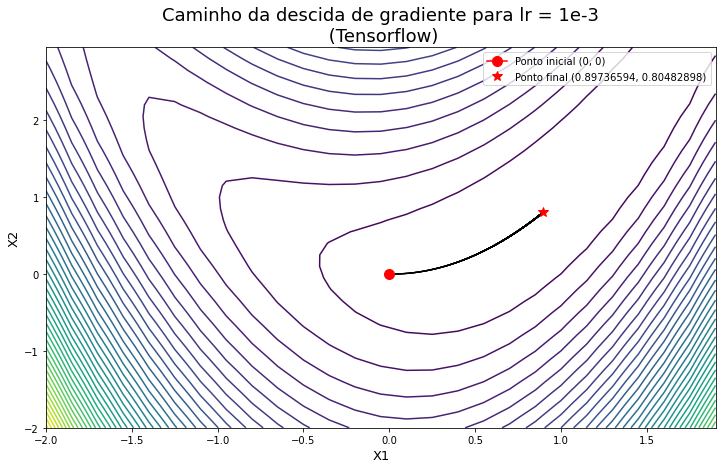

In [45]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente para lr = 1e-3\n (Tensorflow)", fontsize=18)